**Задание Pro**

1. Возьмите произовльную документ (СНИЛС, свидетельство о рождении и т.п.)
2. Проведите распознавание документа с помощью easyocr
3. Выделите (разметьте) основные поля документа, содержащие данные
4. Софрмируйте словарь с координатами полей
5. Выполните "умное" распознавание документа
6. Для выполнеения домашнего задания Вы можете взять произвольное изображение из интернета или отредактировать свой документ, чтобь скрыть персонжальные данные


In [ ]:
%%capture
%pip -q install easyocr
%pip -q install pdf2image
%pip install git+https://github.com/JaidedAI/EasyOCR.git
%pip install pyspellchecker
!apt-get install poppler-utils
!rm -r sample_data

In [ ]:
import gdown
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

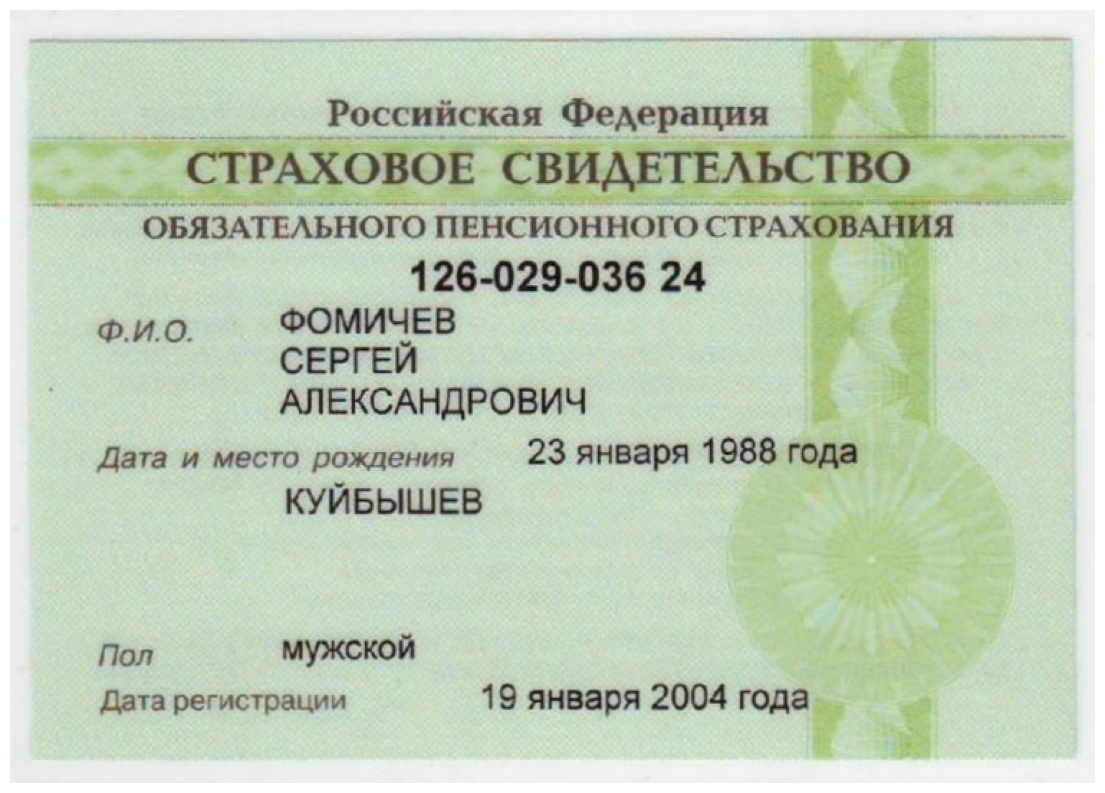

In [ ]:
# "1.Возьмите произовльную документ (СНИЛС, свидетельство о рождении и т.п.)"
test_img_path_ru = gdown.download('https://drive.google.com/uc?id=18E1IHvD9N6Cu_SLZH_MrD-eY2EcFEtFo', None, quiet=True)
test_img_path_ru ="SNILS.jpeg"
img = cv2.imread(test_img_path_ru)
plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# "2.Проведите распознавание документа с помощью easyocr"
reader = easyocr.Reader(['ru'])
img = cv2.imread(test_img_path_ru)
results = reader.readtext(img)
def show_results(results, width):
    for i, result in enumerate(results):
        text = result[1].lower()
        proc = round(result[2] * 100, 2)
        print(f'\033[92m{i:>2}\033[0m | \033[94m{text:^{width}}\033[0m | \033[91m{proc}%\033[0m')
show_results(results, 30)

 0 |      российская_федерация      | 61.25%
 1 |    страховое свиаетехьство     | 52.14%
 2 | обязательного пенсионного страхования | 81.62%
 3 |         126-029-036 24         | 99.92%
 4 |             ф.и.о:             | 51.07%
 5 |            фомичев             | 100.0%
 6 |             сергей             | 100.0%
 7 |         александрович          | 100.0%
 8 |              дата              | 100.0%
 9 |        и место рождения        | 92.17%
10 |      23 января 1988 года       | 99.32%
11 |            куйбышев            | 99.89%
12 |              пол               | 100.0%
13 |            мужской             | 99.51%
14 |        дата регистрации        | 100.0%
15 |      19 января 2004 года       | 97.43%


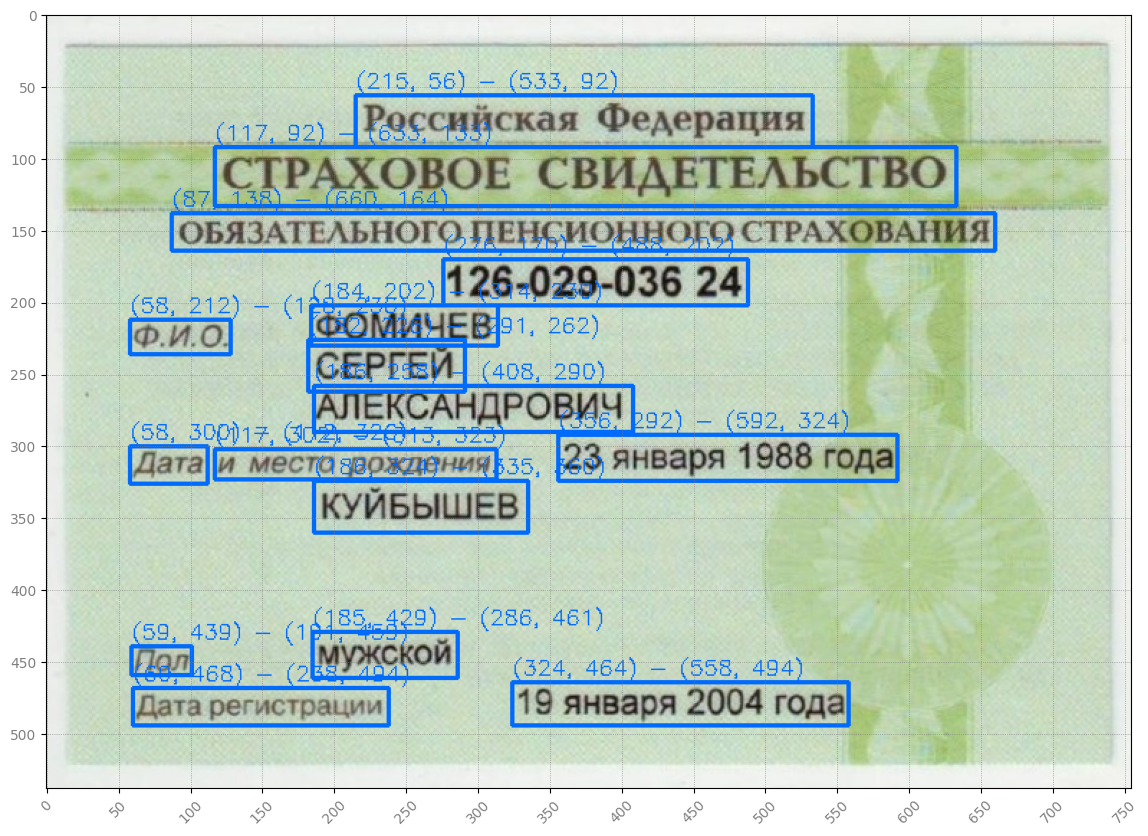

In [ ]:
# "3.Выделите (разметьте) основные поля документа, содержащие данные"
img = cv2.imread(test_img_path_ru)

for i, result in enumerate(results):
    coord1 = list(map(int, result[0][0]))
    coord2 = list(map(int, result[0][2]))
    cv2.rectangle(img, coord1, coord2, (250, 106, 0), 2)
    text = f"({coord1[0]}, {coord1[1]}) - ({coord2[0]}, {coord2[1]})"
    cv2.putText(img, text, (coord1[0], coord1[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (250, 106, 0), 1)

plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks(range(0, img.shape[1], 50), rotation=45, c='gray')
plt.yticks(range(0, img.shape[0], 50), c='gray')
plt.grid(which='both', color='gray', linestyle=':', linewidth=0.5)
plt.show()


In [ ]:
# Координаты полей
img = cv2.imread(test_img_path_ru)
coordinates = []

for i, result in enumerate(results):
    coord1 = list(map(int, result[0][0]))
    coord2 = list(map(int, result[0][2]))
    cv2.rectangle(img, coord1, coord2, (250, 106, 0), 2)
    coordinates.append((coord1, coord2))
print(coordinates)

[([215, 56], [533, 92]), ([117, 92], [633, 133]), ([87, 138], [660, 164]), ([276, 170], [488, 202]), ([58, 212], [128, 236]), ([184, 202], [314, 230]), ([182, 226], [291, 262]), ([186, 258], [408, 290]), ([58, 300], [112, 326]), ([117, 302], [313, 323]), ([356, 292], [592, 324]), ([186, 324], [335, 360]), ([59, 439], [101, 459]), ([185, 429], [286, 461]), ([60, 468], [238, 494]), ([324, 464], [558, 494])]


In [ ]:
# "4.Софрмируйте словарь с координатами полей"
fields = {
    'Страховое свидетельство': [87, 138, 660, 164],
    'Номер': [276, 170, 488, 202],
    'Фамилия': [184, 202, 314, 230],
    'Имя': [182, 226, 291, 262],
    'Отчество': [186, 258, 408, 290],
    'Пол': [185, 429, 286, 461],
    'Дата рождения': [356, 292, 592, 324],
    'Место рождения': [186, 324, 335, 360],
    'Дата регистрации': [324, 464, 558, 494],
}

Страховое свидетельство


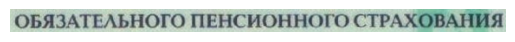

ОБЯЗАТЕЛЬНОГО ПЕНСИОННОГО СТРАХОВАНИЯ 

Номер


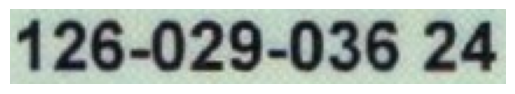

126-029-036 24 

Фамилия


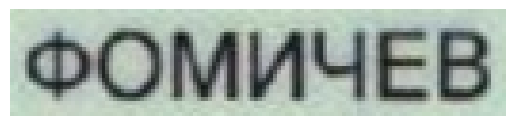

ФОМИЧЕВ 

Имя


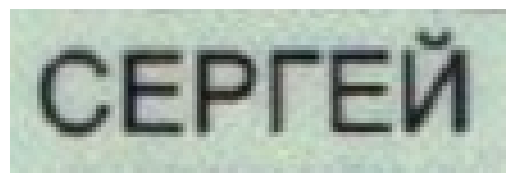

СЕРГЕЙ 

Отчество


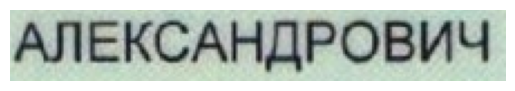

АЛЕКСАНДРОВИЧ 

Пол


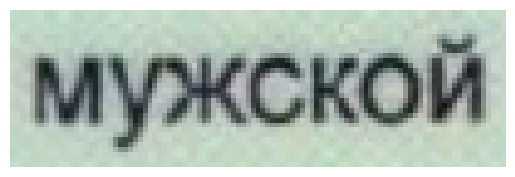

МУЖСКОЙ 

Дата рождения


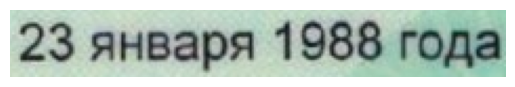

23 ЯНВАРЯ 1988 ГОДА 

Место рождения


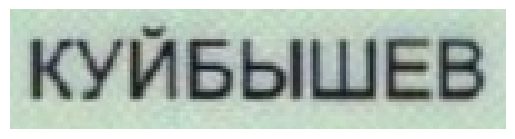

КУЙБЫШЕВ 

Дата регистрации


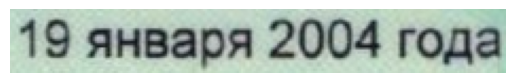

19 ЯНВАРЯ 2004 ГОДА 



In [ ]:
# "5.Выполните "умное" распознавание документа"
img = cv2.imread(test_img_path_ru)
reader = easyocr.Reader(['ru'])

for key in fields:
  x1, y1, x2, y2 = fields[key]
  img_crop = img[y1:y2, x1:x2]
  results = reader.readtext(img_crop)
  print(f'\033[91m{key}\033[0m')
  text = ''
  for result in results:
    text += result[1].lower() + ' '

  if key=='Паспорт выдан':
    text_s = ' '.join(text.split()[2:])
    plt.imshow(img_crop)
    plt.axis('off')
    plt.show()
    print(f'\033[94m{text_s.upper()}\033[0m', end='\n\n')

  else:
    plt.imshow(img_crop)
    plt.axis('off')
    plt.show()
    print(f'\033[94m{text.upper()}\033[0m', end='\n\n')